In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("event_feedback.csv")

# Show first 5 rows
df.head()



,Timestamp,Event Name,Event Type,Rating,Feedback
0,2025-01-05 10:15,Tech Fest 2025,Tech,5,"Amazing event, very informative and well organ..."
1,2025-01-05 10:20,Tech Fest 2025,Tech,4,Good sessions but crowd management can be impr...
2,2025-01-06 14:10,AI Workshop,Workshop,5,Excellent explanation and hands-on practice
3,2025-01-06 14:30,AI Workshop,Workshop,4,"Very helpful workshop, learned a lot"
4,2025-01-07 11:00,Cultural Night,Cultural,5,"Enjoyed the performances, great energy"


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   10 non-null     object
 1   Event Name  10 non-null     object
 2   Event Type  10 non-null     object
 3   Rating      10 non-null     int64 
 4   Feedback    10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


In [3]:
# Check missing values
df.isnull().sum()


,0
Timestamp,0
Event Name,0
Event Type,0
Rating,0
Feedback,0


In [4]:
# Remove empty feedback rows
df.dropna(subset=["Feedback"], inplace=True)

# Ensure Rating is integer
df["Rating"] = df["Rating"].astype(int)

df.head()


,Timestamp,Event Name,Event Type,Rating,Feedback
0,2025-01-05 10:15,Tech Fest 2025,Tech,5,"Amazing event, very informative and well organ..."
1,2025-01-05 10:20,Tech Fest 2025,Tech,4,Good sessions but crowd management can be impr...
2,2025-01-06 14:10,AI Workshop,Workshop,5,Excellent explanation and hands-on practice
3,2025-01-06 14:30,AI Workshop,Workshop,4,"Very helpful workshop, learned a lot"
4,2025-01-07 11:00,Cultural Night,Cultural,5,"Enjoyed the performances, great energy"


In [5]:
df.groupby("Event Name")["Rating"].mean()


,Rating
Event Name,
AI Workshop,4.5
Cultural Night,4.5
Startup Talk,4.0
Tech Fest 2025,4.5
Web Dev Bootcamp,3.5


In [6]:
df.groupby("Event Type")["Rating"].mean()


,Rating
Event Type,
Cultural,4.50
Tech,4.25
Workshop,4.00


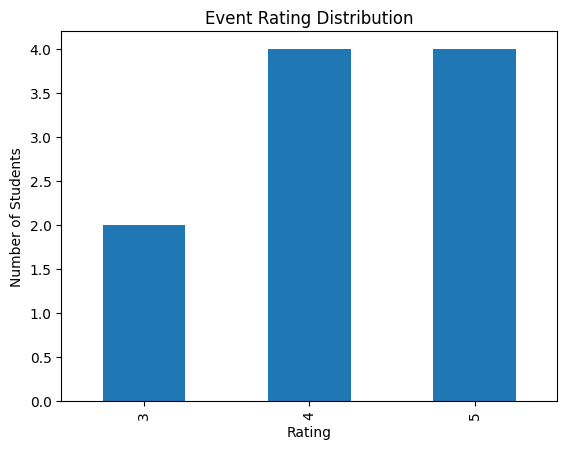

In [7]:
import matplotlib.pyplot as plt

df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Number of Students")
plt.title("Event Rating Distribution")
plt.show()


In [8]:
!pip install textblob


In [9]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Feedback"].apply(get_sentiment)

df[["Feedback", "Sentiment"]].head()


,Feedback,Sentiment
0,"Amazing event, very informative and well organ...",Positive
1,Good sessions but crowd management can be impr...,Positive
2,Excellent explanation and hands-on practice,Positive
3,"Very helpful workshop, learned a lot",Positive
4,"Enjoyed the performances, great energy",Positive


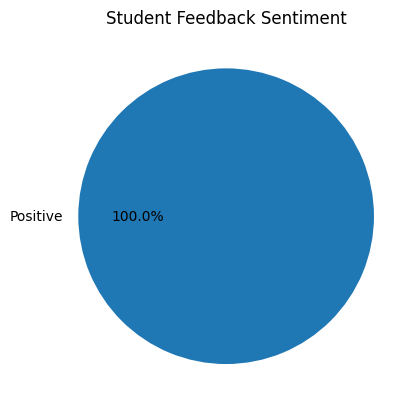

In [10]:
df["Sentiment"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Student Feedback Sentiment"
)
plt.ylabel("")
plt.show()


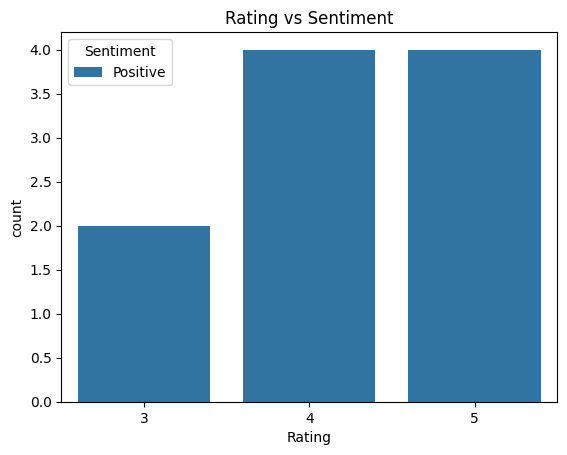

In [11]:
import seaborn as sns

sns.countplot(x="Rating", hue="Sentiment", data=df)
plt.title("Rating vs Sentiment")
plt.show()
